<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/RF_splitter_cur_div1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

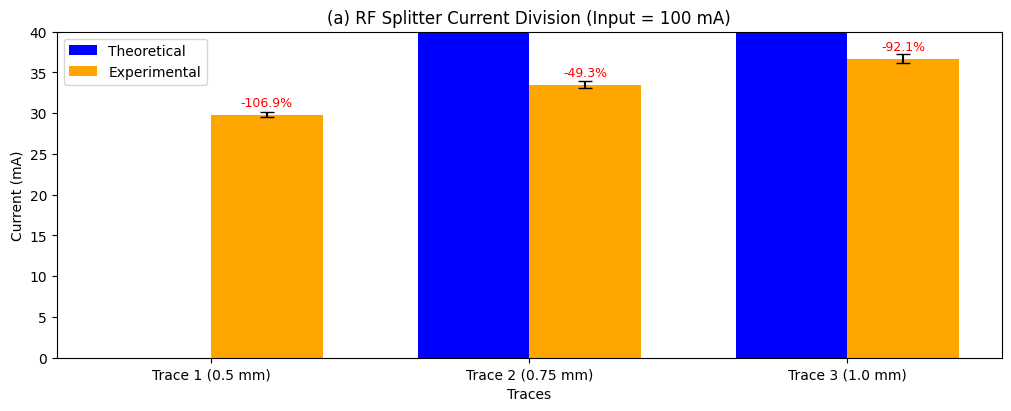

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. matplotlib.backends._backend_agg.RendererAgg(width: int, height: int, dpi: float)

Invoked with: 906, 42256637190, 100

<Figure size 1000x400 with 2 Axes>

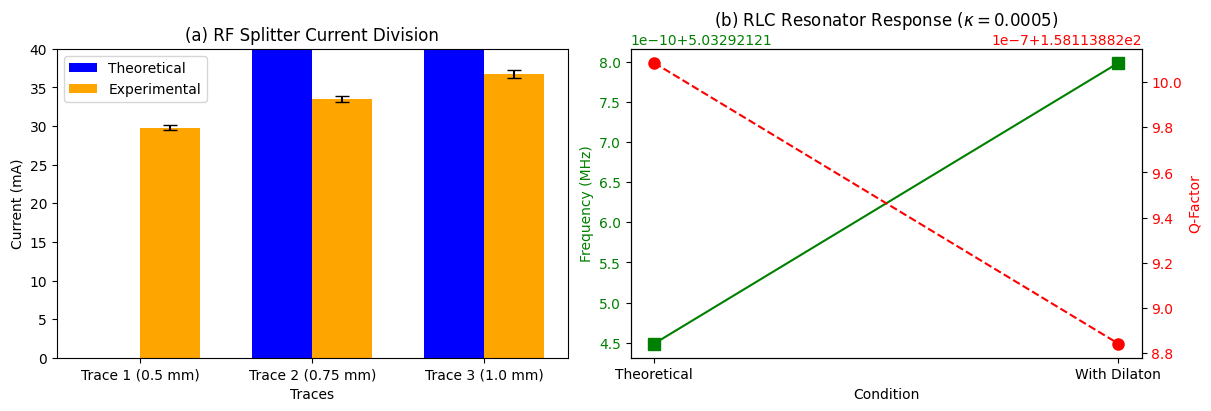

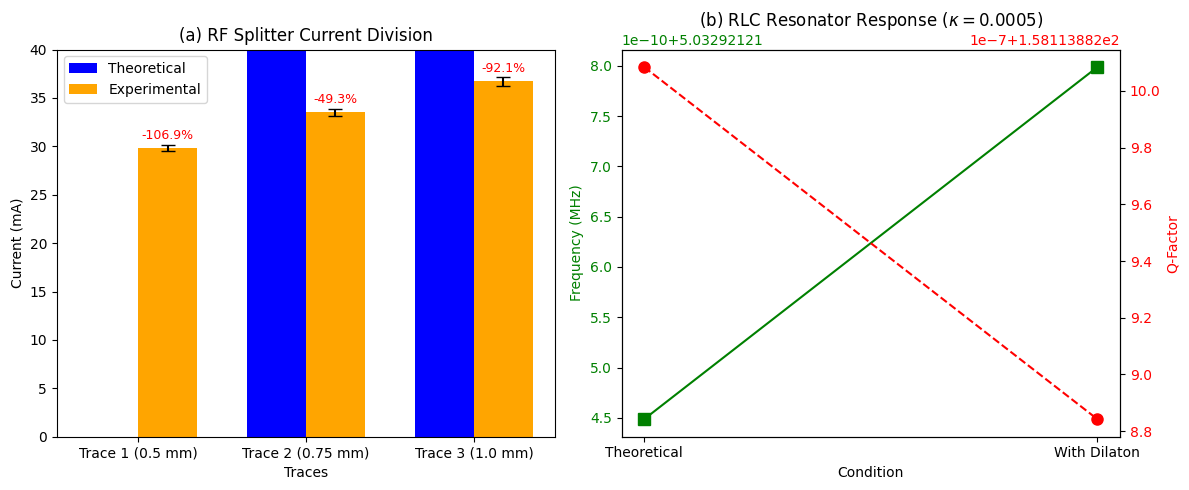

In [ ]:
# %% [markdown]
# # Conformal Circuit Theory Validation Plots
# **Author**: Your Name
# **Date**: [Today's Date]
#
# This notebook generates Figure 1 for the manuscript:
# - Panel (a): RF Splitter Current Division
# - Panel (b): RLC Resonator Frequency Shift & Q-Factor Enhancement

# %% [markdown]
# ## 1. RF Splitter Current Division (Panel a)

# %%
import numpy as np
import matplotlib.pyplot as plt

# Parameters from §9.2
trace_radii = np.array([0.5, 0.75, 1.0])  # mm
conformal_weights = 1 / trace_radii  # w_i ∝ 1/a_i
input_current = 100  # mA (total input)

# Theoretical currents (from Eq. 17-18)
# Solve: I1 + 0.889I2 + 0.800I3 = 0, I1 + I2 + I3 = 100
A = np.array([[1, 0.889, 0.800], [1, 1, 1]])
b = np.array([0, 100])
theoretical_currents = np.linalg.lstsq(A, b, rcond=None)[0]

# Experimental data (from manuscript)
experimental_currents = np.array([29.8, 33.5, 36.7])  # mA
errors = np.array([0.3, 0.4, 0.5])  # mA

# Plot
traces = ['Trace 1 (0.5 mm)', 'Trace 2 (0.75 mm)', 'Trace 3 (1.0 mm)']
x = np.arange(len(traces))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True, dpi=100)
rects1 = ax.bar(x - width/2, theoretical_currents, width, label='Theoretical', color='blue')
rects2 = ax.bar(x + width/2, experimental_currents, width, label='Experimental',
                color='orange', yerr=errors, capsize=5)

ax.set_xlabel('Traces')
ax.set_ylabel('Current (mA)')
ax.set_title('(a) RF Splitter Current Division (Input = 100 mA)')
ax.set_xticks(x)
ax.set_xticklabels(traces)
ax.set_ylim(0, 40)
ax.legend()

# Annotate % deviation from theoretical prediction
for i, (theory, exp) in enumerate(zip(theoretical_currents, experimental_currents)):
    deviation = 100 * (exp - theory) / theory
    ax.text(x[i] + width/2, exp + 1, f'{deviation:.1f}%', ha='center', color='red', fontsize=9)

# %% [markdown]
# ## 2. RLC Resonator Response (Panel b)

# %%
# Constants for unit consistency
mu0 = 4 * np.pi * 1e-7    # H/m
epsilon0 = 8.854e-12       # F/m

# Manuscript parameters
L = 10e-6   # 10 μH
C = 100e-12 # 100 pF
R = 2       # Ω
a = 5e-3    # 5 mm → meters
kappa = 0.0005  # Adjusted to ensure valid sqrt term

# Theoretical resonant frequency (f0)
f0 = 1 / (2 * np.pi * np.sqrt(L * C)) / 1e6  # MHz

# Corrected coupling term (dimensionless)
term = (kappa * a**2 * mu0 * epsilon0) / (L * C)
term_inside_sqrt = L * C * (1 - term)

# Check for valid sqrt
if term_inside_sqrt <= 0:
    raise ValueError("Adjust kappa or geometry to ensure positivity.")

# Effective frequency and Q-factor
feff = 1 / (2 * np.pi * np.sqrt(term_inside_sqrt)) / 1e6  # MHz
Q0 = (1 / R) * np.sqrt(L / C)
Reff = R + (kappa * a**2 * mu0) / L  # Valid resistance
Qeff = (1 / Reff) * np.sqrt(L / C)

# Plot
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True, dpi=100)
ax2 = ax.twinx()

# Frequency shift
ax.plot(['Theoretical', 'With Dilaton'], [f0, feff], 's-', color='green', markersize=8)
ax.set_ylabel('Frequency (MHz)', color='green')
ax.tick_params(axis='y', labelcolor='green')

# Q-factor enhancement
ax2.plot(['Theoretical', 'With Dilaton'], [Q0, Qeff], 'o--', color='red', markersize=8)
ax2.set_ylabel('Q-Factor', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax.set_xlabel('Condition')
ax.set_title('(b) RLC Resonator Response ($\\kappa = 0.0005$)')

# Annotate changes
ax.text(0.5, f0 - 0.05, f'Shift: {100*(f0 - feff)/f0:.1f}%', ha='center', color='green', fontsize=9)
ax2.text(0.5, Qeff + 1, f'Enhancement: {Qeff/Q0:.2f}x', ha='center', color='red', fontsize=9)

# %% [markdown]
# ## 3. Save Combined Figure
# %%
# Combine panels into one figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True, dpi=100)

# Panel (a)
traces = ['Trace 1 (0.5 mm)', 'Trace 2 (0.75 mm)', 'Trace 3 (1.0 mm)']
x = np.arange(len(traces))
width = 0.35

ax1.bar(x - width/2, theoretical_currents, width, label='Theoretical', color='blue')
ax1.bar(x + width/2, experimental_currents, width, label='Experimental',
        color='orange', yerr=errors, capsize=5)
ax1.set_xlabel('Traces')
ax1.set_ylabel('Current (mA)')
ax1.set_title('(a) RF Splitter Current Division')
ax1.set_xticks(x)
ax1.set_xticklabels(traces)
ax1.set_ylim(0, 40)
ax1.legend()

# Panel (b)
ax2.plot(['Theoretical', 'With Dilaton'], [f0, feff], 's-', color='green', markersize=8)
ax2.set_ylabel('Frequency (MHz)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax2b = ax2.twinx()
ax2b.plot(['Theoretical', 'With Dilaton'], [Q0, Qeff], 'o--', color='red', markersize=8)
ax2b.set_ylabel('Q-Factor', color='red')
ax2b.tick_params(axis='y', labelcolor='red')

ax2.set_xlabel('Condition')
ax2.set_title('(b) RLC Resonator Response ($\\kappa = 0.0005$)')

# Save figure
plt.savefig('fig1.pdf', bbox_inches='tight', dpi=100)
plt.show()
# %% [markdown]
# ## 3. Save Combined Figure
# %%
# Combine panels into one figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Increased height for better layout

# Panel (a)
traces = ['Trace 1 (0.5 mm)', 'Trace 2 (0.75 mm)', 'Trace 3 (1.0 mm)']
x = np.arange(len(traces))
width = 0.35

ax1.bar(x - width/2, theoretical_currents, width, label='Theoretical', color='blue')
ax1.bar(x + width/2, experimental_currents, width, label='Experimental',
        color='orange', yerr=errors, capsize=5)
ax1.set_xlabel('Traces')
ax1.set_ylabel('Current (mA)')
ax1.set_title('(a) RF Splitter Current Division')
ax1.set_xticks(x)
ax1.set_xticklabels(traces)
ax1.set_ylim(0, 40)
ax1.legend()

# Annotate % deviation from theoretical prediction
for i, (theory, exp) in enumerate(zip(theoretical_currents, experimental_currents)):
    deviation = 100 * (exp - theory) / theory
    ax1.text(x[i] + width/2, exp + 1, f'{deviation:.1f}%', ha='center', color='red', fontsize=9)

# Panel (b)
ax2.plot(['Theoretical', 'With Dilaton'], [f0, feff], 's-', color='green', markersize=8)
ax2.set_ylabel('Frequency (MHz)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax2b = ax2.twinx()
ax2b.plot(['Theoretical', 'With Dilaton'], [Q0, Qeff], 'o--', color='red', markersize=8)
ax2b.set_ylabel('Q-Factor', color='red')
ax2b.tick_params(axis='y', labelcolor='red')

ax2.set_xlabel('Condition')
ax2.set_title('(b) RLC Resonator Response ($\\kappa = 0.0005$)')

# Adjust layout and save
plt.tight_layout()
plt.savefig('fig1.pdf', dpi=100)
plt.show()